# Summer School of Data Science - Split '17

# 1. Introduction to Machine Learning with TensorFlow

This hands-on session serves as an introductory course for essential TensorFlow usage and basic machine learning with TensorFlow. This notebook is partly based on and follow the approach of chapter 6 of the book "Deep Learning" by Ian Goodfellow, Yoshua Bengio and Aaron Courville, available at: http://www.deeplearningbook.org/.

Other useful tutorials exist in the form of Jupyter notebooks, some of which are:
- https://github.com/udacity/deep-learning
- https://github.com/DataScienceUB/DeepLearningfromScratch

This notebook covers basic TensorFlow usage concepts, which are then applied to elementary machine learning models like linear and logistic regression, and finally a simple multilayer perceptron is built and trained using the established TensorFlow concepts.

## Basic TensorFlow concepts

TensorFlow is an open source Python library which provides multiple APIs for buidling and evaluating computational graphs. These graphs can be used to represent any machine learning model, and TensorFlow provides methods for efficient optimization and evaluation of the models. The programmer's guide for TensorFlow can be found at https://www.tensorflow.org/programmers_guide/, and the full documentation is availale at https://www.tensorflow.org/api_docs/python/.

The import statement for TensorFlow programs is: `import tensorflow as tf`. This provides access to all TensorFlow APIs, classes, methods and symbols. 

In [1]:
import tensorflow as tf

### Tensor

The basic concept behind TensorFlow is the tensor - an n-dimensional array of a base datatype. In TensorFlow it is represented by the `tf.Tensor` object which will produce a value when evaluated. A `tf.Tensor` object has a shape (which defines the structure of the elements) and a data type, shared by all the elements in the Tensor. The main types of tensors are:
- Constant
- Variable
- Placeholder

The [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant) method creates a constant tensor, populated with values of a data type, specified by arguments `value`, `shape` (optional), [`dtype`](https://www.tensorflow.org/api_docs/python/tf/DType) (optional).

In [2]:
# create a TensorFlow constant tensor


In [3]:
# create a TensorFlow constant of a specific data type and shape


However, any Tensor is only evaluated within a [`Session`](https://www.tensorflow.org/api_docs/python/tf/Session), which is the environment in which all tensors and operations are executed.

In [4]:
# create a TensorFlow session and evaluate the created constant


Other very common and useful methods for creating tensors of constant value are [`tf.zeros()`](https://www.tensorflow.org/api_docs/python/tf/zeros) and [`tf.ones()`](https://www.tensorflow.org/api_docs/python/tf/ones).

In [5]:
# create a tensor of any shape populated with zeros and check within the session


In [6]:
# create a tensor of any shape populated with ones and check within the session


Tensors containing random values from various distribution can be created using a number of methods, with the most commonly used being [`tf.random_uniform()`](https://www.tensorflow.org/api_docs/python/tf/random_uniform) and [`tf.random_normal()`](https://www.tensorflow.org/api_docs/python/tf/random_normal).

In [7]:
# create a random tensor containing values from a uniform distribution between 10 and 20


Simple algebraic operations such as `+`,`-`,`/`,and `*` can be used with tensors in this form, or by calling [`tf.add()`](https://www.tensorflow.org/api_docs/python/tf/add), [`tf.subtract()`](https://www.tensorflow.org/api_docs/python/tf/subtract), [`tf.divide()`](https://www.tensorflow.org/api_docs/python/tf/divide), or [`tf.multiply()`](https://www.tensorflow.org/api_docs/python/tf/multiply). These are all element-wise, and defined for tensors of equal shapes and data-types. Tensors can be cast into a specific data type by calling [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast).

In [8]:
# add a scalar to a tensor


In [9]:
# subtract two tensors


In [10]:
# divide two integer tensors


Other very useful operations include:
- Absolute value (modulus) - [`tf.abs()`](https://www.tensorflow.org/api_docs/python/tf/abs)
- Exponentiation with $e$ - [`tf.exp()`](https://www.tensorflow.org/api_docs/python/tf/exp)
- Square and other powers - [`tf.square()`](https://www.tensorflow.org/api_docs/python/tf/square) and [`tf.pow()`](https://www.tensorflow.org/api_docs/python/tf/pow)
- Matrix multiplication - [`tf.matmul()`](https://www.tensorflow.org/api_docs/python/tf/matmul)
- Transpose - [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose)

In [11]:
# try out varied mathematical operations with various tensors



### Placeholders and Variables

Placeholders and Vairables are special kinds of tensors which are the essential building blocks of more complex data and computation streams. These are the most commonly used types of tensors in TensorFlow. 

A [Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) is a tensor which acts like a "promise" to provide a value at the evaluation of the computational graph. Placeholders are mostly used as input points in the computational graph where data will be provided. It will produce an error when evaluated, unless the value is fed to the session.

In [12]:
# create a placeholder and feed it a value in a session


# create two placeholders and a tensor implementing matrix multiplication 


A [Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) is a tensor which allows the addition of trainable parameters to the computational graph. Constants are intialized when created, as opposed to variables, which need to be initialized within the session (and the initialization procedure must be defined). Variables can be "manually" assigned a new value using [`tf.assign`](https://www.tensorflow.org/api_docs/python/tf/assign), and their state is kept within the session object. This is mostly used for model training, during which variables are changed within the optimization process. 

In [13]:
# create a variable, initialize it, and assign a new value within a session



## Linear regression in TensorFlow

Linear regression is one of the simplest and most commonly used regression models. The multivariate linear regression can be written as: 

$$y = w^{T}x + b$$

where $y \in \mathbb{R}$ is the output, $w \in \mathbb{R}^{p}$ is a column vector containing $p$ weights for $p$ features in $x \in \mathbb{R}^{p}$, and $b \in \mathbb{R}$ is the bias. The parameters contained in $w$ and $b$ are also called coefficients and are trained by using a gradient descent algorithm.


### Exercise:

Let us build a univariate linear regression model for a simple problem, using the previously introduced TensorFlow concepts:
- The model input $x$ is a placeholder for data
- The trainable model parameters $w$ and $b$ are defined as TensorFlow Variables
- The model output $\hat{y}$ is a Tensor
- The obesrved output $y$ is also a placeholder, where data will be provided for training purpose

In [14]:
#define placeholders for data

#define model parameters as variables

#create a tensor which calculates the model output


To train a model built in TensorFlow, a loss function needs to be defined, most commonly as a [reduction](https://www.tensorflow.org/api_guides/python/math_ops#Reduction) operation. An [optimizer](https://www.tensorflow.org/api_guides/python/train#Optimizers) object needs to be defined, and the [`minimize()`](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#minimize) method called in order to update the variables defined within the model to minimize the selected loss function. When creating optimizer objects, choices about the learning rate have to be made - these, in combination with the number of training epochs, can greatly influence the model training process. With the approapriate learning rate, the optimization can quickly converge.

In [15]:
#define the loss function as the mean of all squared errors (MSE)

#create a gradient descent optimizer

#create a train operation

#generate data to train the regression

#initialize variables, run 100 epochs of training algorithm


## Logistic Regression

Logistic regression is a very common and simple linear model for classification purposes, based on linear regression and the logistic function:

$$y = \frac{1}{1+e^{-(w^{T}x + b)}}$$

Due to the nature of the logistic function, it produces output values in the range $[0,1]$, thus providing a probability for each class given in the output. Similar to linear regression, the variables defined within the logistic regression model are parameters trainable by various optimization algorithms.

Let us build a logistic regression for the well-known XOR problem.

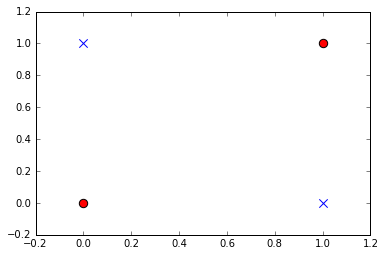

In [16]:
#generate XOR training data
import numpy as np
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

#import matplotlib for visualization
%matplotlib inline
import matplotlib.pyplot as plt

#logical indices of data where the outputs are 1 and 0
t = np.where(y_train==1)[0]
f = np.where(y_train==0)[0]

#scatter plot of the data
plt.scatter(x_train[t,0],x_train[t,1],c='b',marker='x',s=70)
plt.scatter(x_train[f,0],x_train[f,1],c='r',marker='o',s=70)

### Exercise:
- The model input $x$ is a placeholder for a data
- The trainable model parameters $w$ and $b$ are defined as TensorFlow Variables
- The model output $\hat{y}$ is a Tensor
- The obesrved output $y$ is also a placeholder, where output data will be provided in order to train the model

In [17]:
#define placeholders for the data

#define variables for the trainable parameters of the model

#create a tensor to calculate the model output

#define the loss function, create the optimizer and the training operation

#train the model


Inspect the trained model parameters and the model outputs. What is the minimum found by the optimizer?

## Multilayer Perceptron

A multilayer perceptron is a feedforward network that can be thought of a model composed of multiple nested functions, for instance:

$$y = f^{(3)}(f^{(2)}(f^{(1)}(x)))$$

This means that the output of each function is routed as the input of the next function, and this operational and data flow is strictly one-directional (thus "feedforward") and may contain multiple layers of nested functions (thus "deep"). TensorFlow is a very suitable tool for building and training such models. Here we will consider the XOR problem once again, and build a multilayer perceptron to classify the data correctly.

It was demonstrated previously that the XOR data are not linearly separable - this means that a non-linear layer (function) within the model is needed to tranform the problem to a linearly separable space. This is in fact the core of the multilayer perceptron as well as other deep learning models - nonlinear activation functions such as the logistic function, $tanh$, or ReLU. A comprehensive guide for TensorFlow supported functions can be found in: https://www.tensorflow.org/versions/r0.12/api_docs/python/nn/activation_functions_.

Let us build a multilayer perceptron model where the sigmoid activation function is used for the hiddern layer. Let:
- $f^{(1)}(x) = W^{(1)}x + b^{(1)}$
- $f^{(2)}(x) = {1}/({1+e^{-x}})$
- $f^{(3)}(x) = W^{(2)}x + b^{(2)}$

with $W^{(1)} \in \mathbb{R}^{2\times 2}$, $b^{(1)} \in \mathbb{R}^{2\times 1}$, $W^{(2)} \in \mathbb{R}^{2\times 1}$, and $b^{(2)} \in \mathbb{R}$. 


The first layer $f^{(1)}(x) = W^{(1)}x + b^{(1)}$ is a linear transformation of the input, and thus cannot transform the XOR problem to a linearly separable space. Let us inspect the trained parameters $W^{(1)}$ and $b^{(1)}$, and the output of the first layer.  

The next layer $f^{(2)}(x)$ is the sigmoid function, which is a nonlinear transformation of the input, thus providing the possibility of transforming the problem to a new space where the outputs could be linearly separable.

The final layer is the model output:

The network seems to have learned to classify the XOR problem correctly, thanks to the multi-layered structure and the non-linear activation function in the hidden layer. This example embodies the some of the primary reasons for employing deep learning models, especially for highly non-linear problems where traditional linear approaches fail.